In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from scipy.io import loadmat

plt.rcParams['axes.linewidth'] = 1.5

In [13]:
df = pd.read_csv('Data/MeiklejohnCa.csv')

In [14]:
# Load new run from unity
solid = loadmat('output_from_unity/MDICE_37New/solid.mat', simplify_cells=True)
fluid = loadmat('output_from_unity/MDICE_37New/fluid.mat', simplify_cells=True)
wr = loadmat('output_from_unity/MDICE_37New/wr.mat', simplify_cells=True)

sol_new_low = solid['solid']
flu_new_low = fluid['fluid']
wr_new_low = wr['wr']

# Load new run from unity
solid = loadmat('output_from_unity/MDICE_low_d44Ca/solid.mat', simplify_cells=True)
fluid = loadmat('output_from_unity/MDICE_low_d44Ca/fluid.mat', simplify_cells=True)
wr = loadmat('output_from_unity/MDICE_low_d44Ca/wr.mat', simplify_cells=True)

sol = solid['solid']
flu = fluid['fluid']
wr = wr['wr']

In [15]:
flu_new_low['dC'][0][0]

-3.7

In [16]:
flu[0]['dC'][0][0]

-10.0

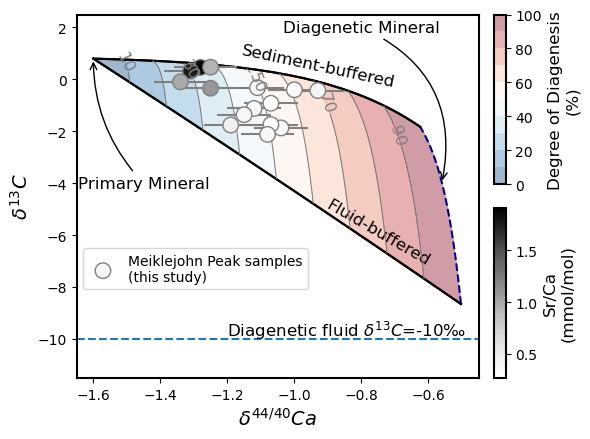

In [17]:
fig = plt.figure(figsize=(6,4.5))

width = [1, 0.03]
height = [1, 1]

gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=width, height_ratios=height)

ax = fig.add_subplot(gs[0:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

dCa = sol[0]['dCa']
dC = sol[0]['dC']
aragdC = sol[0]['arag']['dC']
aragdCa = sol[0]['arag']['dCa']
procent = sol[0]['procent']

mplot = ax.contourf(dCa, dC, procent*100, levels=np.linspace(0,100,11),
                    cmap='RdBu_r', alpha=0.40)
contours = ax.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
           colors='gray', linewidths=0.75,zorder=4)

ax.clabel(contours, levels=[10, 30, 50, 70, 90], inline=True, fontsize=12)


ax.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
ax.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')
ax.plot(dCa[:,0], dC[:,0], 'black', linewidth=1.5)
ax.plot(dCa[:,-1], dC[:,-1], 'black', linewidth=1.5)


mplot2 = ax.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], ec='grey', cmap='Greys',s=125,
           zorder=5, label='Meiklejohn Peak samples\n(this study)')

ax.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')

ax.text(-1.2, flu[0]['dC'][0][0]+0.15, 
        'Diagenetic fluid $\delta^{13}C$='+ 
         str(round(flu[0]['dC'][0][0]))+'‰',
         fontsize=12)

ax.axhline(y=flu[0]['dC'][0][0], ls='--')


ax.set_xlim(-1.65, -0.45)
ax.set_ylim(-11.5, 2.5)

ax.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)

ax.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))








# Add colorbar
cbar = fig.colorbar(mplot, cax=ax1)
cbar.ax.set_ylabel('Degree of Diagenesis\n(%)', fontsize=12)

# Add colorbar
cbar = fig.colorbar(mplot2, cax=ax2)
cbar.ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=12)

fig.tight_layout()

ax.text(0.75, 0.40, 'Fluid-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-30)

ax.text(0.60, 0.86, 'Sediment-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-12, zorder=10)



ax.annotate("Primary Mineral",
            xy=(aragdCa, aragdC), xycoords='data',
            xytext=(-1.45, -4), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))


ax.annotate("Diagenetic Mineral",
            xy=(-0.56, -4), xycoords='data',
            xytext=(-0.8, 2), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.4"))

plt.savefig("Figure/Modeling_Annotated_New_SrCa.png", dpi=300)
plt.savefig("Figure/Modeling_Annotated_New_SrCa.svg")

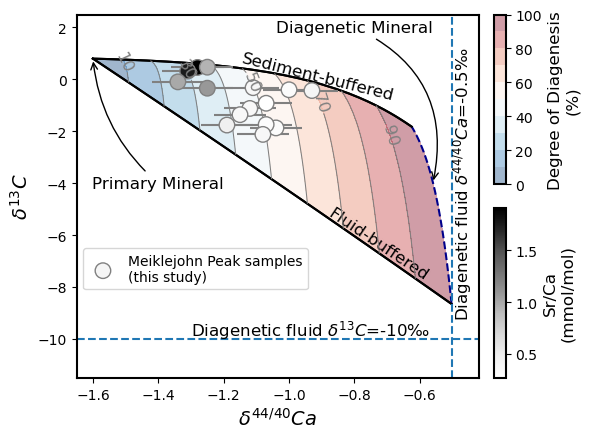

In [18]:
fig = plt.figure(figsize=(6,4.5))

width = [1, 0.03]
height = [1, 1]

gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=width, height_ratios=height)

ax = fig.add_subplot(gs[0:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

dCa = sol[0]['dCa']
dC = sol[0]['dC']
aragdC = sol[0]['arag']['dC']
aragdCa = sol[0]['arag']['dCa']
procent = sol[0]['procent']

mplot = ax.contourf(dCa, dC, procent*100, levels=np.linspace(0,100,11),
                    cmap='RdBu_r', alpha=0.40)
contours = ax.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
           colors='gray', linewidths=0.75,zorder=4)

ax.clabel(contours, levels=[10, 30, 50, 70, 90], inline=True, fontsize=12)


ax.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
ax.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')
ax.plot(dCa[:,0], dC[:,0], 'black', linewidth=1.5)
ax.plot(dCa[:,-1], dC[:,-1], 'black', linewidth=1.5)


mplot2 = ax.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], ec='grey', cmap='Greys',s=125,
           zorder=5, label='Meiklejohn Peak samples\n(this study)')

ax.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')


ax.axhline(y=flu[0]['dC'][0][0], ls='--')
ax.axvline(x=-0.5, ls='--')

ax.set_xlim(-1.65, -0.42)
ax.set_ylim(-11.5, 2.5)

ax.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)

ax.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))




# Add colorbar
cbar = fig.colorbar(mplot, cax=ax1)
cbar.ax.set_ylabel('Degree of Diagenesis\n(%)', fontsize=12)

# Add colorbar
cbar = fig.colorbar(mplot2, cax=ax2)
cbar.ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=12)

fig.tight_layout()

ax.text(0.75, 0.37, 'Fluid-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-34)

ax.text(0.60, 0.83, 'Sediment-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-14, zorder=10)


ax.text(-1.3, flu[0]['dC'][0][0]+0.15, 
        'Diagenetic fluid $\delta^{13}C$='+ 
         str(round(flu[0]['dC'][0][0]))+'‰',
         fontsize=12)

ax.text(-0.47,-4, 
        'Diagenetic fluid $\delta^{44/40}Ca$=-0.5‰', ha='center', va='center', rotation=90,
         fontsize=12)

ax.annotate("Primary Mineral",
            xy=(aragdCa, aragdC), xycoords='data',
            xytext=(-1.4, -4), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))


ax.annotate("Diagenetic Mineral",
            xy=(-0.56, -4), xycoords='data',
            xytext=(-0.8, 2), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.4"))

plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine.png", dpi=300)
plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine.svg")

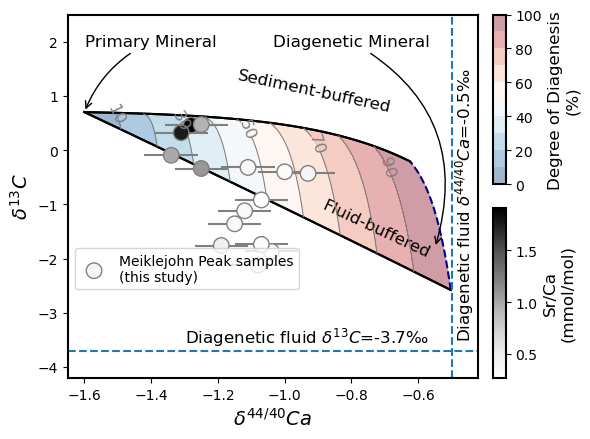

In [19]:
fig = plt.figure(figsize=(6,4.5))

width = [1, 0.03]
height = [1, 1]

gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=width, height_ratios=height)

ax = fig.add_subplot(gs[0:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

dCa = sol_new_low['dCa']
dC = sol_new_low['dC']
aragdC = sol_new_low['arag']['dC']
aragdCa = sol_new_low['arag']['dCa']
procent = sol_new_low['procent']

mplot = ax.contourf(dCa, dC, procent*100, levels=np.linspace(0,100,11),
                    cmap='RdBu_r', alpha=0.40)
contours = ax.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
           colors='gray', linewidths=0.75,zorder=4)

ax.clabel(contours, levels=[10, 30, 50, 70, 90], inline=True, fontsize=12)


ax.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
ax.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')
ax.plot(dCa[:,0], dC[:,0], 'black', linewidth=1.5)
ax.plot(dCa[:,-1], dC[:,-1], 'black', linewidth=1.5)


mplot2 = ax.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], ec='grey', cmap='Greys',s=125,
           zorder=5, label='Meiklejohn Peak samples\n(this study)')

ax.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')


ax.axhline(y=flu_new_low['dC'][0][0], ls='--')
ax.axvline(x=-0.5, ls='--')

ax.set_xlim(-1.65, -0.42)
ax.set_ylim(-4.2, 2.5)

ax.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)

ax.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))




# Add colorbar
cbar = fig.colorbar(mplot, cax=ax1)
cbar.ax.set_ylabel('Degree of Diagenesis\n(%)', fontsize=12)

# Add colorbar
cbar = fig.colorbar(mplot2, cax=ax2)
cbar.ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=12)

fig.tight_layout()

ax.text(0.75, 0.41, 'Fluid-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-25)

ax.text(0.60, 0.79, 'Sediment-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-12, zorder=10)


ax.text(-1.3, flu_new_low['dC'][0][0]+0.15, 
        'Diagenetic fluid $\delta^{13}C$='+ 
         str(round(flu_new_low['dC'][0][0],1))+'‰',
         fontsize=12)

ax.text(-0.46,-1, 
        'Diagenetic fluid $\delta^{44/40}Ca$=-0.5‰', ha='center', va='center', rotation=90,
         fontsize=12)

ax.annotate("Primary Mineral",
            xy=(aragdCa, aragdC), xycoords='data',
            xytext=(-1.4, 2), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"))


ax.annotate("Diagenetic Mineral",
            xy=(-0.55, -1.8), xycoords='data',
            xytext=(-0.8, 2), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.4"))

plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine_fluid-37.png", dpi=300)
plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine_fluid-37.svg")

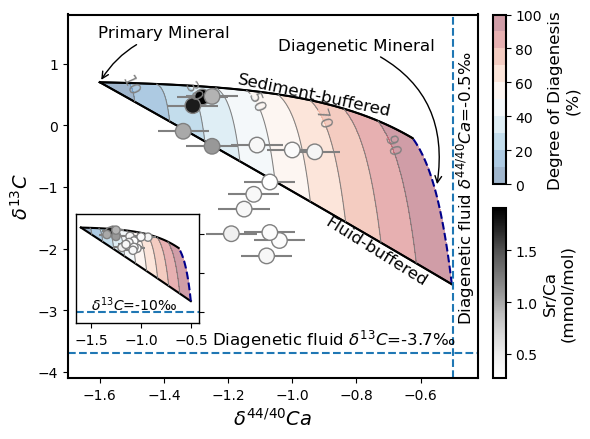

In [20]:
fig = plt.figure(figsize=(6,4.5))

width = [1, 0.03]
height = [1, 1]

gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=width, height_ratios=height)

ax = fig.add_subplot(gs[0:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

dCa = sol_new_low['dCa']
dC = sol_new_low['dC']
aragdC = sol_new_low['arag']['dC']
aragdCa = sol_new_low['arag']['dCa']
procent = sol_new_low['procent']

mplot = ax.contourf(dCa, dC, procent*100, levels=np.linspace(0,100,11),
                    cmap='RdBu_r', alpha=0.40)
contours = ax.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
           colors='gray', linewidths=0.75,zorder=4)

ax.clabel(contours, levels=[10, 30, 50, 70, 90], inline=True, fontsize=12)


ax.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
ax.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')
ax.plot(dCa[:,0], dC[:,0], 'black', linewidth=1.3)
ax.plot(dCa[:,-1], dC[:,-1], 'black', linewidth=1.3)


mplot2 = ax.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], ec='grey', cmap='Greys',s=125,
           zorder=5, label='Meiklejohn Peak samples\n(this study)')

ax.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')


ax.axhline(y=flu_new_low['dC'][0][0], ls='--')
ax.axvline(x=-0.5, ls='--')

ax.set_xlim(-1.70, -0.42)
ax.set_ylim(-4.1, 1.8)

ax.set_xlabel('$\delta^{44/40}Ca$', fontsize=14)
ax.set_ylabel('$\delta^{13}C$', fontsize=14)

# ax.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))




# Add colorbar
cbar = fig.colorbar(mplot, cax=ax1)
cbar.ax.set_ylabel('Degree of Diagenesis\n(%)', fontsize=12)

# Add colorbar
cbar = fig.colorbar(mplot2, cax=ax2)
cbar.ax.set_ylabel('Sr/Ca\n(mmol/mol)', fontsize=12)

fig.tight_layout()

ax.text(0.75, 0.35, 'Fluid-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-32)

ax.text(0.60, 0.78, 'Sediment-buffered', transform=ax.transAxes, fontsize=12,
        ha='center', va='center', rotation=-12, zorder=10)


ax.text(-1.25, flu_new_low['dC'][0][0]+0.15, 
        'Diagenetic fluid $\delta^{13}C$='+ 
         str(round(flu_new_low['dC'][0][0],1))+'‰',
         fontsize=12)

ax.text(-0.46,-1, 
        'Diagenetic fluid $\delta^{44/40}Ca$=-0.5‰', 
        ha='center', va='center', rotation=90, fontsize=12)

ax.annotate("Primary Mineral",
            xy=(aragdCa, aragdC), xycoords='data',
            xytext=(-1.4, 1.5), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"))


ax.annotate("Diagenetic Mineral",
            xy=(-0.55, -1.), xycoords='data',
            xytext=(-0.8, 1.3), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.4"))

ax0 = inset_axes(
    ax,
    width="30%",  # width: 30% of parent_bbox width
    height="30%",  # height: 30%
    loc="lower left",
    bbox_to_anchor=(0.02, 0.15, 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)

# -10 permil d13C
dCa = sol[0]['dCa']
dC = sol[0]['dC']
aragdC = sol[0]['arag']['dC']
aragdCa = sol[0]['arag']['dCa']
procent = sol[0]['procent']

ax0.contourf(dCa, dC, procent*100, levels=np.linspace(0,100,11),
                    cmap='RdBu_r', alpha=0.40)
contours = ax0.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
           colors='gray', linewidths=0.75,zorder=4)


ax0.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
ax0.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')
# ax0.plot(dCa[:,0], dC[:,0], 'black')
# ax0.plot(dCa[:,-1], dC[:,-1], 'black')


ax0.scatter(df["d44Ca"], df["d13C"], c=df["Sr/Ca"], ec='grey', cmap='Greys',s=35,
           zorder=5)

ax0.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')


ax0.axhline(y=flu[0]['dC'][0][0], ls='--')

ax0.set_xlim(-1.65, -0.42)
ax0.set_ylim(-11.5, 2.5)

ax0.tick_params(left=False, right=True, labelleft=False, labelright=False)

ax0.text(-1.5, round(flu[0]['dC'][0][0])+0.25, 
        '$\delta^{13}C$=' + str(round(flu[0]['dC'][0][0]))+'‰',
         fontsize=10)

for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1)

plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine_fluid-37_inset.png", dpi=300)
plt.savefig("Figure/Modeling_Annotated_New_SrCa_withCaLine_fluid-37_inset.svg")

In [21]:
# Load new run from unity
solid = loadmat('output_from_unity/MDICE_37NewSensitivity/solid.mat', simplify_cells=True)
fluid = loadmat('output_from_unity/MDICE_37NewSensitivity/fluid.mat', simplify_cells=True)
wr = loadmat('output_from_unity/MDICE_37NewSensitivity/wr.mat', simplify_cells=True)

sol = solid['solid']
flu = fluid['fluid']
wr = wr['wr']

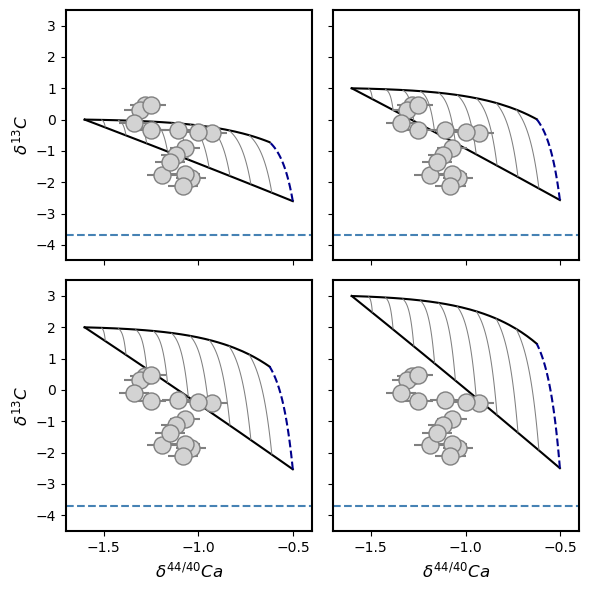

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, 
                                sharey=True, figsize=(6,6))

ax= [ax1, ax2, ax3, ax4]

for i, a in zip(range(4), ax):
    dCa = sol[i]['dCa']
    dC = sol[i]['dC']
    aragdC = sol[i]['arag']['dC']
    aragdCa = sol[i]['arag']['dCa']
    procent = sol[i]['procent']


    contours = a.contour(dCa, dC, procent*100, levels=np.linspace(0,100,11), 
            colors='gray', linewidths=0.75,zorder=4)


    a.plot(dCa[:,[0,-1]], dC[:,[0,-1]], 'k')
    a.plot(dCa[-1,:], dC[-1,:], 'darkblue', ls='--')



    a.scatter(df["d44Ca"], df["d13C"], ec='grey', fc='lightgrey',s=150,
            zorder=5)

    a.errorbar(df["d44Ca"], df["d13C"], xerr=0.08, yerr=0.1, c='grey', fmt='none')
    a.axhline(y=-3.7, ls='--', c='steelblue')
    a.set_xlim(-1.7, -0.4)
    a.set_ylim(-4.5, 3.5)

for a in (ax1, ax3):
        a.set_ylabel('$\delta^{13}C$', fontsize=12)

for a in (ax3, ax4):
        a.set_xlabel('$\delta^{44/40}Ca$', fontsize=12)

plt.tight_layout()
plt.savefig("Figure/Modeling_Sensitivity_Aragd13C.png", dpi=300)
plt.savefig("Figure/Modeling_Sensitivity_Aragd13C.svg")